In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path = 'main_path'
train_path = 'train_data_path'
test_path = 'test_data_path'

In [4]:
val_ratio = 0.2
IMG_SIZE = (256, 256)
BATCH_SIZE = 64
train_dir = 'train_dir'

In [ ]:
!pip install -q fastbook

In [6]:
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision import *
from fastai.metrics import *

In [8]:
classes = tuple(os.listdir(train_path))

In [7]:

data = DataBlock(
    	blocks=(ImageBlock, CategoryBlock),
    	get_items=get_image_files,
    	splitter=RandomSplitter(valid_pct=0.1,seed=42),
    	get_y=parent_label,
    	item_tfms=Resize(256),
	)

#
#data = DataBlock(
#  blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
#  get_items=get_image_files,
#  splitter=RandomSplitter(valid_pct=0.2,seed=42),
#  get_y=parent_label,
#  item_tfms=Resize(300)
#)

In [9]:

data = data.new(
    	item_tfms=RandomResizedCrop(224, min_scale=0.5),
    	batch_tfms=aug_transforms(
      mult = 1,
      do_flip = False,
      flip_vert = False,
      max_rotate = 10,
      min_zoom = 0.0,
      max_zoom = 2.0,
      max_lighting = 0.6,
      max_warp = 0.2,
      p_affine = 0.0,
      p_lighting = 0.0,
      xtra_tfms = None,
      size = None,
      mode = "bilinear",
      pad_mode = "reflection",
      align_corners = True,
      batch = False,
      min_scale = 1,
))


In [10]:
dls = data.dataloaders(train_path, bs = 32)

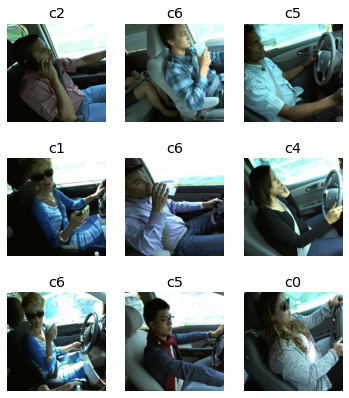

In [ ]:
dls.show_batch(max_n=9, figsize=(6,7))

In [ ]:
learn = cnn_learner(dls, models.resnet50, metrics = accuracy)

In [ ]:
for i in range(10):
	print(f'iteration : {i}')
	learn.fit_one_cycle(1) #transfer learning
	learn.save(f'{path}/data/models/a3.1.1.{i}')
	learn.export(fname=f'{path}/data/learned_pickles/model{i}.pkl')

In [ ]:
model = f'{path}/data/learned_pickles/model9.pkl'

In [ ]:
import os
images = []
for image in os.listdir(f'{path}/data/test'):
  images.append(image)

In [ ]:
print(len(images))

79726


In [ ]:
learn_inf = load_learner(model)

In [ ]:
#single predict - predict
import time
start_time = round(time.time()*1000)
pred, pred_idx, probs = learn_inf.predict(f'{path}/data/test/img_409.jpg')
prob_value = probs[pred_idx] * 100
end_time = round(time.time()*1000) - start_time
print(f'{pred} - {prob_value:.02f}%   ({end_time}ms)')

c6 - 100.00%   (91ms)


In [ ]:
import torch
model_pkl = torch.load(model)

comparison of the detection method

In [ ]:
start_time = round(time.time()*1000)
result = model_pkl.predict(f'{path}/data/test/img_409.jpg')
end_time = round(time.time()*1000) - start_time
print(end_time)
print(result)

In [ ]:
import time
for image in images:
  start_time = round(time.time()*1000)
  pred, pred_idx, probs = learn_inf.predict(f'{path}/data/test/{image}')
  prob_value = probs[pred_idx] * 100
  end_time = round(time.time()*1000) - start_time
  print(f'{image} - {pred} - {prob_value:.02f}%   ({end_time}ms)')